In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as s

In [32]:
data = pd.read_csv(r"D:\new file d\NOTEBOOK\LUNG CANCER PREDICTION\survey lung cancer.csv")

In [33]:
print(f"Shape of The Dataset : {data.shape}")
print(f"\nGlimpse of The Dataset :")
data.head()

Shape of The Dataset : (309, 16)

Glimpse of The Dataset :


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [34]:
data.describe(include=object)

,GENDER,LUNG_CANCER
count,309,309
unique,2,2
top,M,YES
freq,162,270


In [35]:
data.isna().sum().to_frame()

,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


In [36]:
dup = data[data.duplicated()].shape[0]
print(f"There are {dup} duplicate entries among {data.shape[0]} entries in this dataset.")

data.drop_duplicates(keep='first',inplace=True)
print(f"\nAfter removing duplicate entries there are {data.shape[0]} entries in this dataset.")

There are 33 duplicate entries among 309 entries in this dataset.

After removing duplicate entries there are 276 entries in this dataset.


In [37]:
data_temp = data.copy()
data_temp["GENDER"] = data_temp["GENDER"].replace({"M" : "Male" , "F" : "Female"})

for column in data_temp.columns:
    data_temp[column] = data_temp[column].replace({2: "Yes" , 1 : "No"})

data_temp.head()   

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,Male,69,No,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,YES
1,Male,74,Yes,No,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,YES
2,Female,59,No,No,No,Yes,No,Yes,No,Yes,No,Yes,Yes,No,Yes,NO
3,Male,63,Yes,Yes,Yes,No,No,No,No,No,Yes,No,No,Yes,Yes,NO
4,Female,63,No,Yes,No,No,No,No,No,Yes,No,Yes,Yes,No,No,NO


In [38]:
s.set_style("whitegrid")
s.set_context("poster",font_scale = .7)

palette = ["#1d7874","#679289","#f4c095","#ee2e31","#ffb563","#918450","#f85e00","#a41623","#9a031e","#d6d6d6","#ffee32","#ffd100","#333533","#202020"]


In [39]:
data_temp_pos = data_temp[data_temp["LUNG_CANCER"] == "YES"]
data_temp_pos.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,Male,69,No,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,YES
1,Male,74,Yes,No,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,YES
5,Female,75,No,Yes,No,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,YES
6,Male,52,Yes,No,No,No,No,Yes,No,Yes,Yes,Yes,Yes,No,Yes,YES
7,Female,51,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,No,Yes,Yes,No,YES


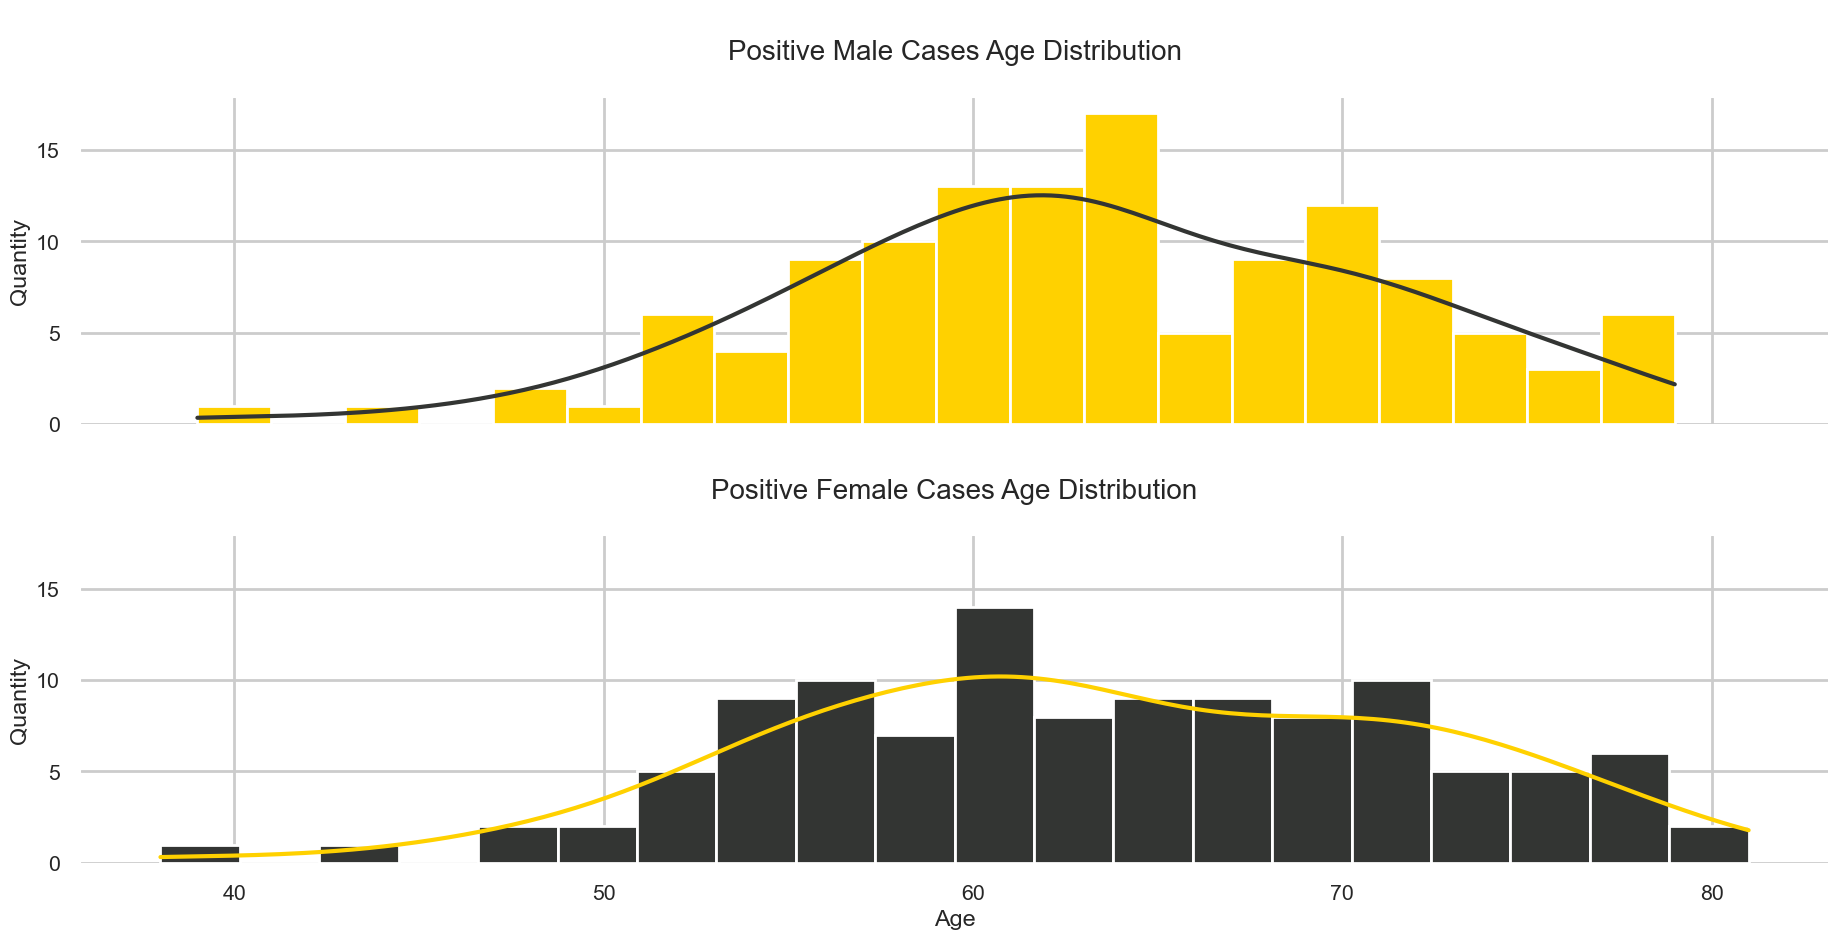

In [40]:
_, axs = plt.subplots(2,1,figsize=(20,10),sharex=True,sharey=True)
plt.tight_layout(pad=4.0)

s.histplot(data_temp_pos[data_temp_pos["GENDER"]=="Male"]["AGE"],color=palette[11],kde=True,ax=axs[0],bins=20,alpha=1,fill=True)
axs[0].lines[0].set_color(palette[12])
axs[0].set_title("\nPositive Male Cases Age Distribution\n",fontsize=20)
axs[0].set_xlabel("Age")
axs[0].set_ylabel("Quantity")

s.histplot(data_temp_pos[data_temp_pos["GENDER"]=="Female"]["AGE"],color=palette[12],kde=True,ax=axs[1],bins=20,alpha=1,fill=True)
axs[1].lines[0].set_color(palette[11])
axs[1].set_title("\nPositive Female Cases Age Distribution\n",fontsize=20)
axs[1].set_xlabel("Age")
axs[1].set_ylabel("Quantity")

s.despine(left=True, bottom=True)
plt.show()

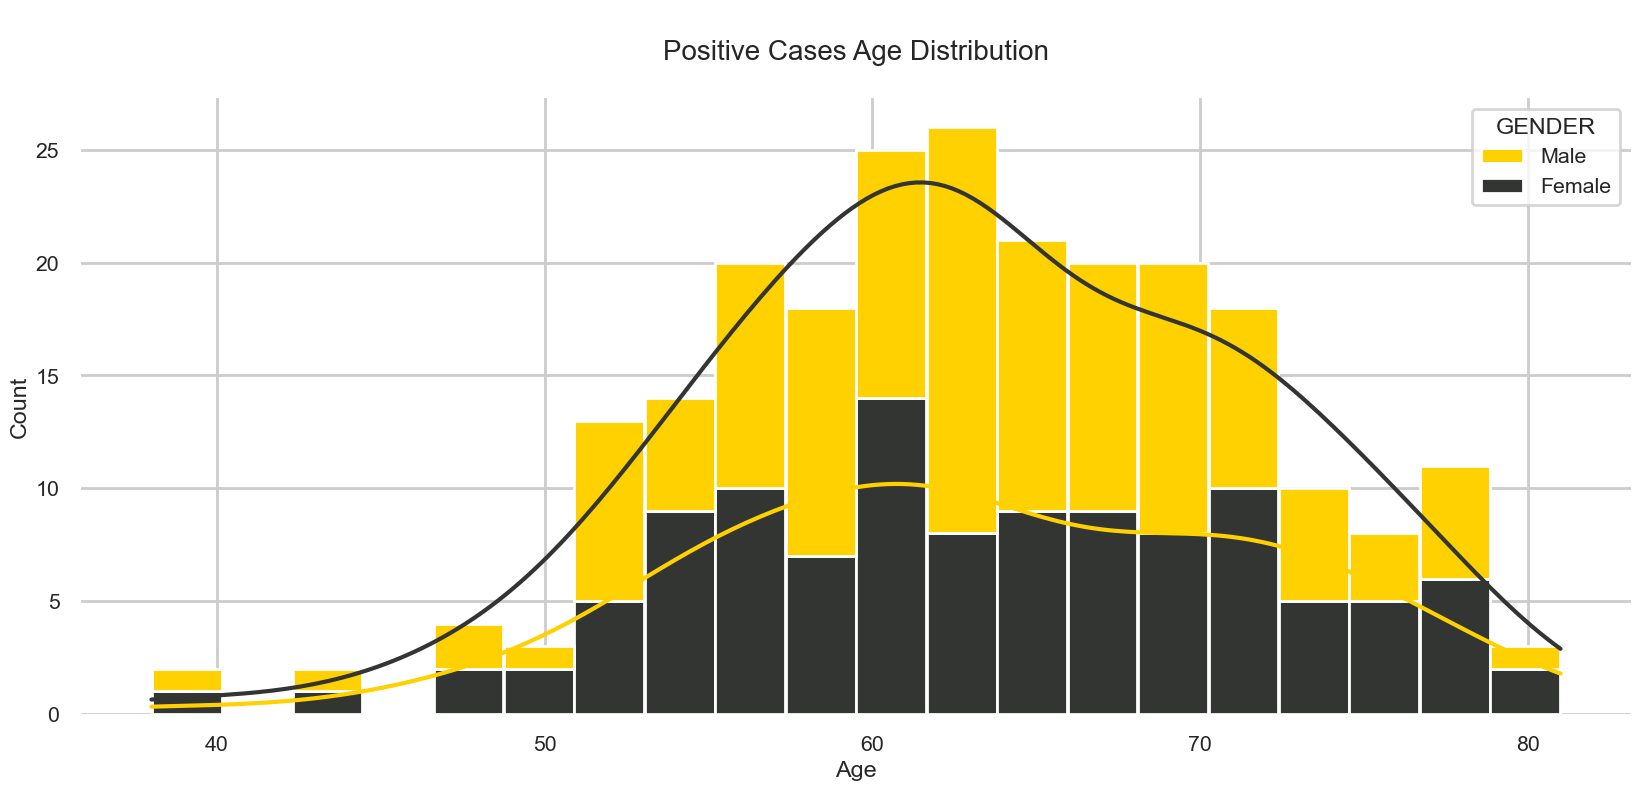

In [41]:
plt.subplots(figsize=(20, 8))
p = s.histplot(data=data_temp_pos,x="AGE",hue="GENDER",multiple="stack",palette=palette[11:13],kde=True,shrink=.99,bins=20,alpha=1,fill=True)
p.axes.lines[0].set_color(palette[11])
p.axes.lines[1].set_color(palette[12])
p.axes.set_title("\nPositive Cases Age Distribution\n",fontsize=20)
plt.ylabel("Count")
plt.xlabel("Age")

s.despine(left=True, bottom=True)
plt.show()


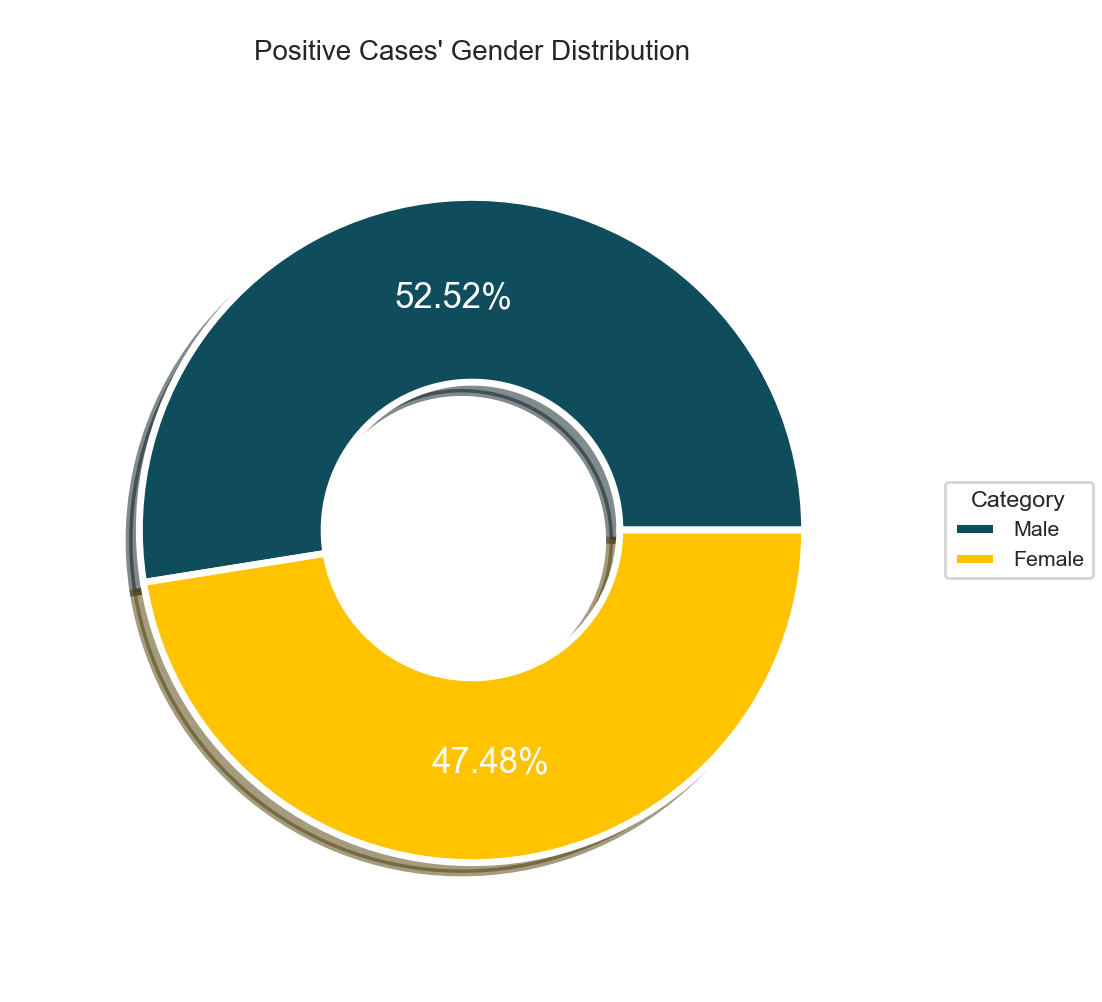

In [42]:
plt.subplots(figsize=(12, 12))

labels = "Male","Female"
size = 0.5

wedges, texts, autotexts = plt.pie([len(data_temp_pos[data_temp_pos["GENDER"]=="Male"]["GENDER"]),
                                    len(data_temp_pos[data_temp_pos["GENDER"]=="Female"]["GENDER"])],
                                    explode = (0,0),
                                    textprops=dict(size= 25, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.7,
                                    radius=.9, 
                                    colors = ["#0f4c5c","#FFC300"], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "white", 
                                    linewidth = 5),
                                    startangle = 0)

plt.legend(wedges, labels, title="Category",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("\nPositive Cases' Gender Distribution",fontsize=20)
plt.show()

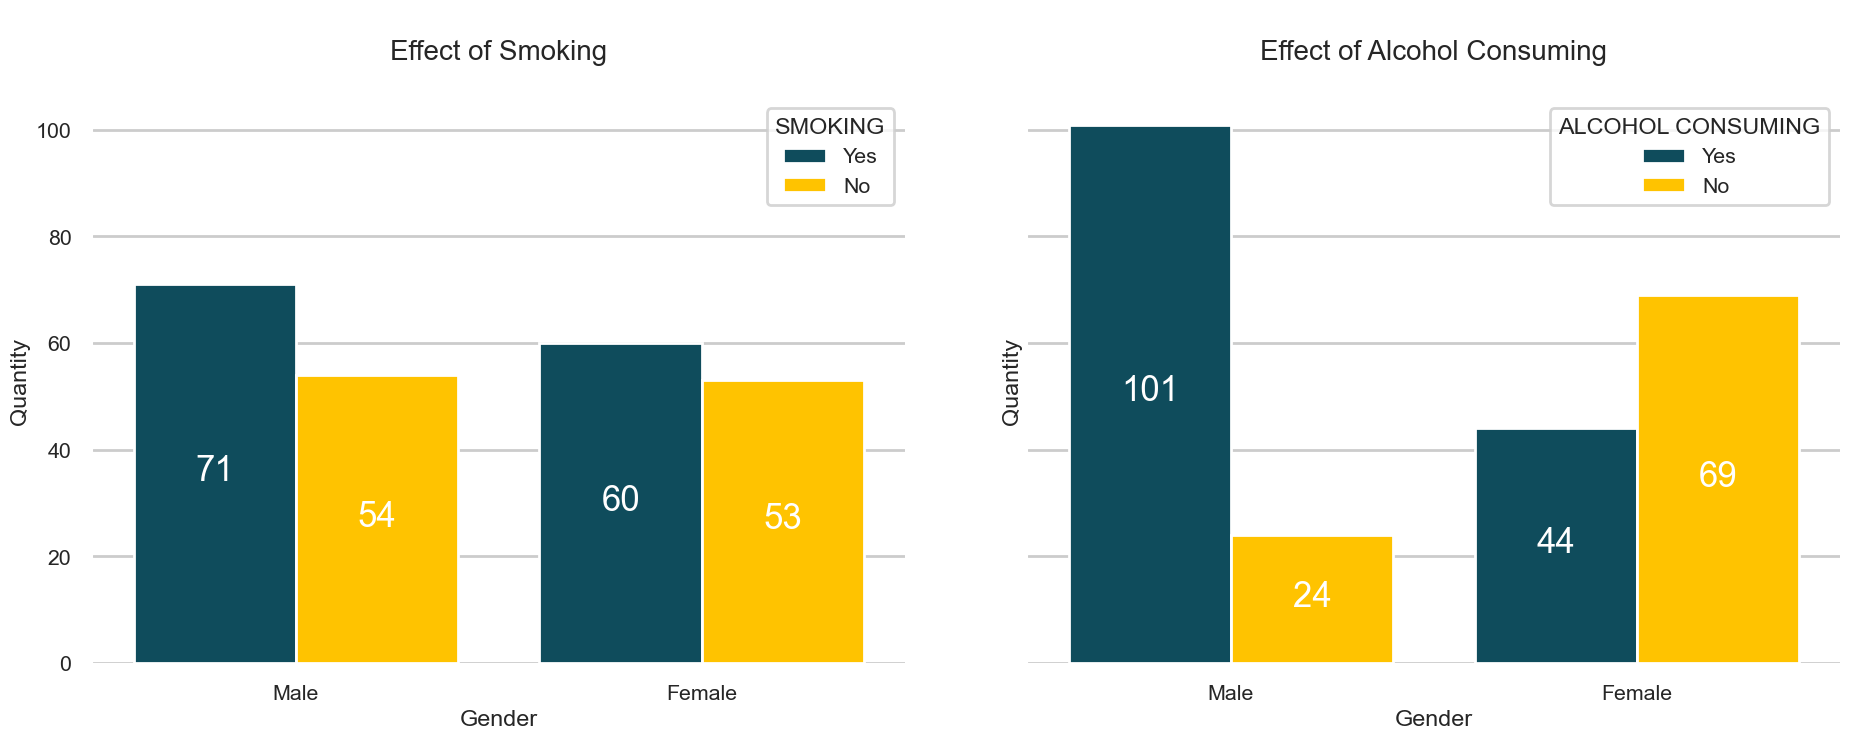

In [43]:
_, axs = plt.subplots(1,2,figsize=(20,8),sharex=True,sharey=True)
plt.tight_layout(pad=4.0)

s.countplot(data=data_temp_pos,x="GENDER",hue="SMOKING",hue_order=["Yes","No"],ax=axs[0],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[0].set_title("\nEffect of Smoking\n",fontsize=20)
axs[0].set_xlabel("Gender")
axs[0].set_ylabel("Quantity")
for container in axs[0].containers:
    axs[0].bar_label(container,label_type="center",padding=2,size=25,color="white",rotation=0)

s.countplot(data=data_temp_pos,x="GENDER",hue="ALCOHOL CONSUMING",hue_order=["Yes","No"],ax=axs[1],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[1].set_title("\nEffect of Alcohol Consuming\n",fontsize=20)
axs[1].set_xlabel("Gender")
axs[1].set_ylabel("Quantity")
for container in axs[1].containers:
    axs[1].bar_label(container,label_type="center",padding=2,size=25,color="white",rotation=0)

s.despine(left=True, bottom=True)
plt.show()

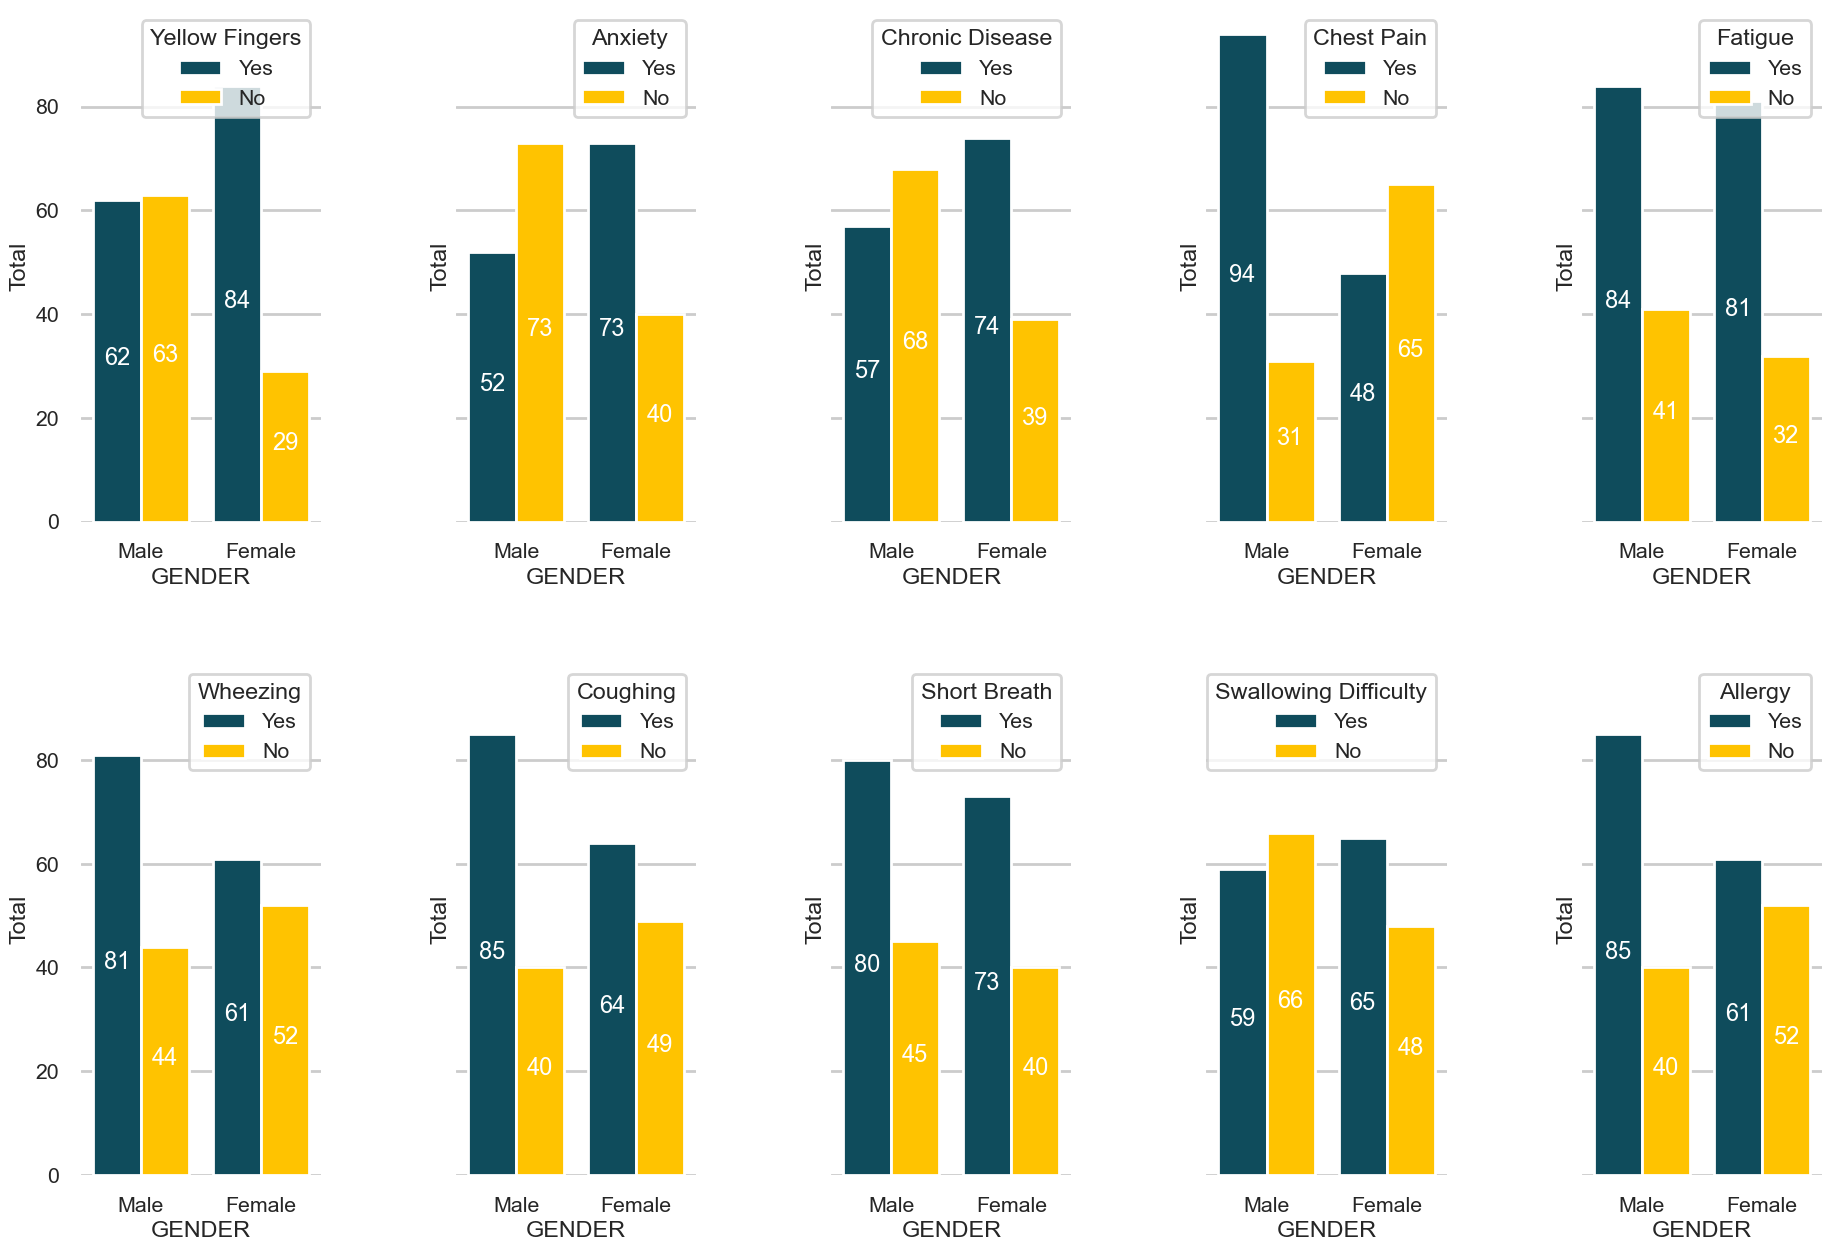

In [44]:
_, axs = plt.subplots(2,5,figsize=(20,14),sharex=False,sharey=True)
plt.tight_layout(pad=4.0)

s.countplot(data=data_temp_pos,x="GENDER",hue="YELLOW_FINGERS",hue_order=["Yes","No"],ax=axs[0,0],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[0,0].set_ylabel("Total")
axs[0,0].legend(title="Yellow Fingers",loc="upper right")
for container in axs[0,0].containers:
    axs[0,0].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)

s.countplot(data=data_temp_pos,x="GENDER",hue="ANXIETY",hue_order=["Yes","No"],ax=axs[0,1],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[0,1].set_ylabel("Total")
axs[0,1].legend(title="Anxiety",loc="upper right")
for container in axs[0,1].containers:
    axs[0,1].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)

s.countplot(data=data_temp_pos,x="GENDER",hue="CHRONIC DISEASE",hue_order=["Yes","No"],ax=axs[0,2],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[0,2].set_ylabel("Total")
axs[0,2].legend(title="Chronic Disease",loc="upper right")
for container in axs[0,2].containers:
    axs[0,2].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)

s.countplot(data=data_temp_pos,x="GENDER",hue="CHEST PAIN",hue_order=["Yes","No"],ax=axs[0,3],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[0,3].set_ylabel("Total")
axs[0,3].legend(title="Chest Pain",loc="upper right")
for container in axs[0,3].containers:
    axs[0,3].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)

s.countplot(data=data_temp_pos,x="GENDER",hue="FATIGUE ",hue_order=["Yes","No"],ax=axs[0,4],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[0,4].set_ylabel("Total")
axs[0,4].legend(title="Fatigue",loc="upper right")
for container in axs[0,4].containers:
    axs[0,4].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)

s.countplot(data=data_temp_pos,x="GENDER",hue="WHEEZING",hue_order=["Yes","No"],ax=axs[1,0],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[1,0].set_ylabel("Total")
axs[1,0].legend(title="Wheezing",loc="upper right")
for container in axs[1,0].containers:
    axs[1,0].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)

s.countplot(data=data_temp_pos,x="GENDER",hue="COUGHING",hue_order=["Yes","No"],ax=axs[1,1],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[1,1].set_ylabel("Total")
axs[1,1].legend(title="Coughing",loc="upper right")
for container in axs[1,1].containers:
    axs[1,1].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)

s.countplot(data=data_temp_pos,x="GENDER",hue="SHORTNESS OF BREATH",hue_order=["Yes","No"],ax=axs[1,2],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[1,2].set_ylabel("Total")
axs[1,2].legend(title="Short Breath",loc="upper right")
for container in axs[1,2].containers:
    axs[1,2].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)

s.countplot(data=data_temp_pos,x="GENDER",hue="SWALLOWING DIFFICULTY",hue_order=["Yes","No"],ax=axs[1,3],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[1,3].set_ylabel("Total")
axs[1,3].legend(title="Swallowing Difficulty",loc="upper right")
for container in axs[1,3].containers:
    axs[1,3].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)    

s.countplot(data=data_temp_pos,x="GENDER",hue="ALLERGY ",hue_order=["Yes","No"],ax=axs[1,4],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[1,4].set_ylabel("Total")
axs[1,4].legend(title="Allergy",loc="upper right")
for container in axs[1,4].containers:
    axs[1,4].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)    

s.despine(left=True, bottom=True)
plt.show()

In [45]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()

data["GENDER"] = data["GENDER"].replace({"M" : "Male" , "F" : "Female"})
data["LUNG_CANCER"] = LabelEncoder.fit_transform(data["LUNG_CANCER"])

data = pd.get_dummies(data, columns= ["GENDER"])
data.rename(columns={"GENDER_Male" : "MALE", "GENDER_Female" : "FEMALE", "YELLOW_FINGERS" : "YELLOW FINGERS", "PEER_PRESSURE" : "PEER PRESSURE", "LUNG_CANCER" : "LUNG CANCER", "FATIGUE " : "FATIGUE", "ALLERGY " : "ALLERGY"}, inplace=True)
data = data[["AGE","MALE","FEMALE","ALCOHOL CONSUMING","CHEST PAIN","SHORTNESS OF BREATH","COUGHING","PEER PRESSURE","CHRONIC DISEASE","SWALLOWING DIFFICULTY","YELLOW FINGERS","ANXIETY","FATIGUE","ALLERGY","WHEEZING","LUNG CANCER"]]
data.head()

,AGE,MALE,FEMALE,ALCOHOL CONSUMING,CHEST PAIN,SHORTNESS OF BREATH,COUGHING,PEER PRESSURE,CHRONIC DISEASE,SWALLOWING DIFFICULTY,YELLOW FINGERS,ANXIETY,FATIGUE,ALLERGY,WHEEZING,LUNG CANCER
0,69,1,0,2,2,2,2,1,1,2,2,2,2,1,2,1
1,74,1,0,1,2,2,1,1,2,2,1,1,2,2,1,1
2,59,0,1,1,2,2,2,2,1,1,1,1,2,1,2,0
3,63,1,0,2,2,1,1,1,1,2,2,2,1,1,1,0
4,63,0,1,1,1,2,2,1,1,1,2,1,1,1,2,0


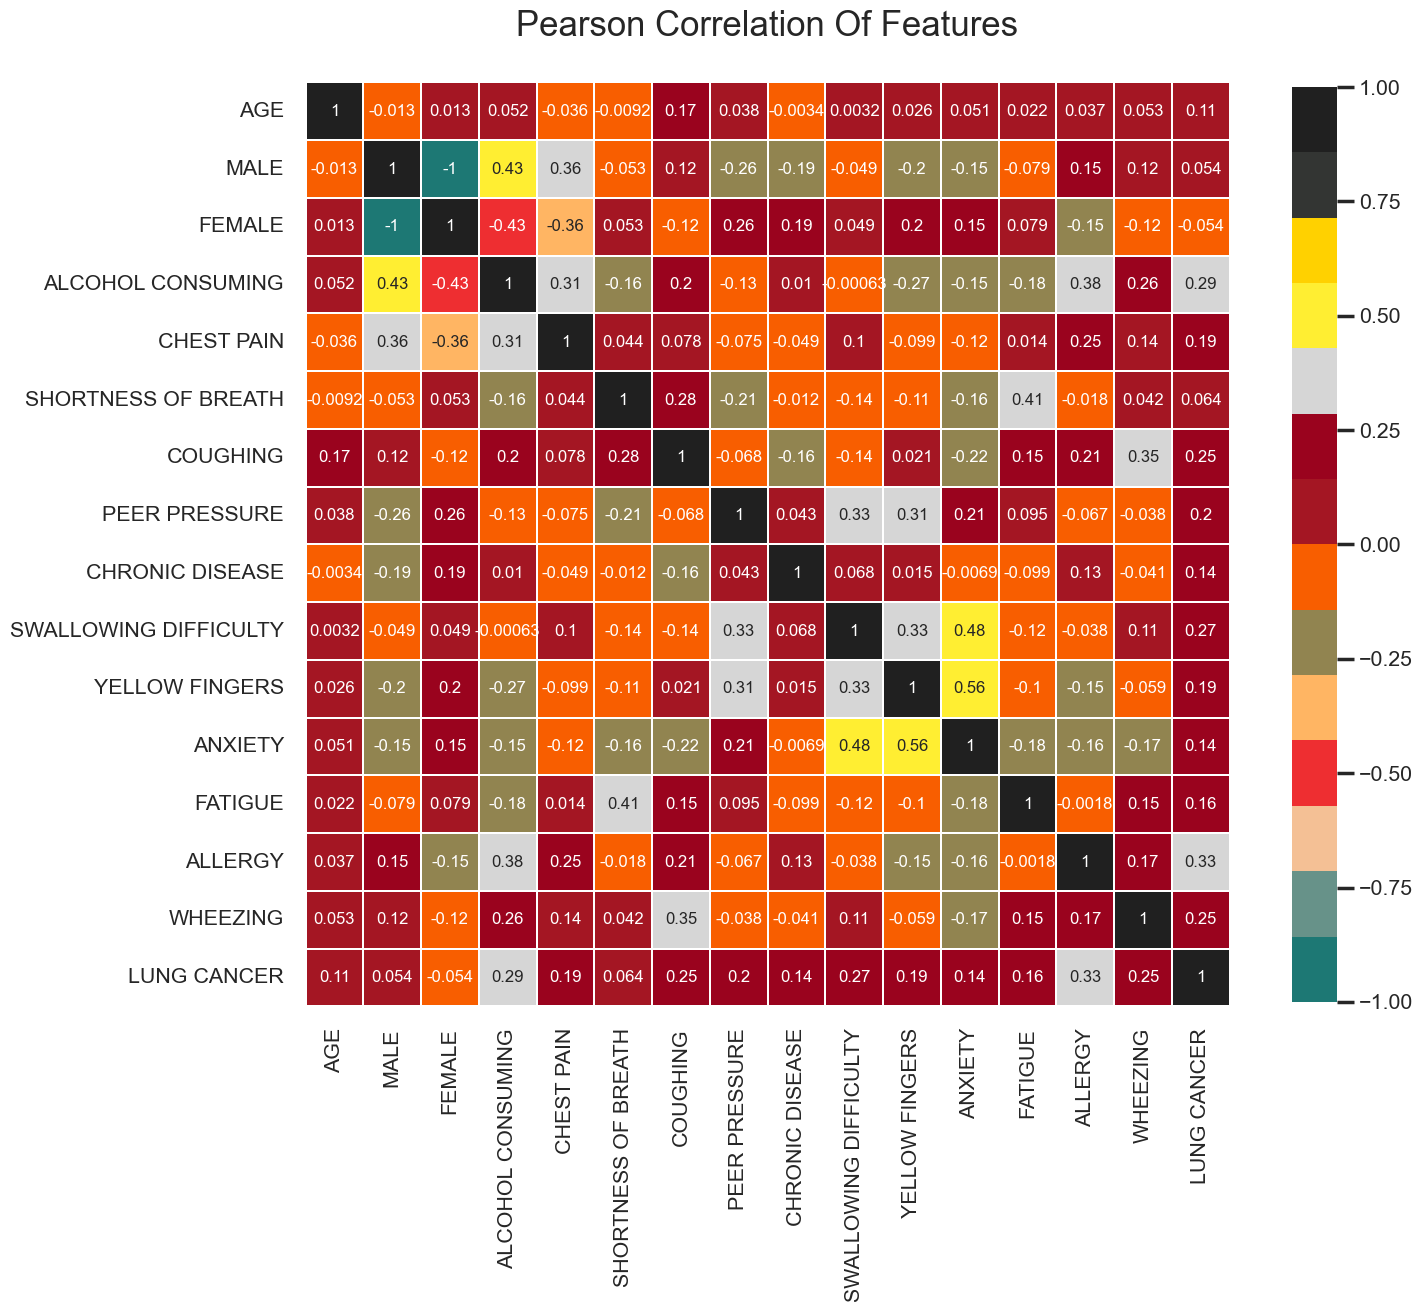

In [46]:
plt.subplots(figsize =(16, 12))

p=s.heatmap(data.corr(), cmap = palette, square=True, cbar_kws=dict(shrink =.99), 
            annot=True, vmin=-1, vmax=1, linewidths=0.1,linecolor='white',annot_kws=dict(fontsize =12))
p.axes.set_title("Pearson Correlation Of Features\n", fontsize=25)
plt.xticks(rotation=90)
plt.show()

In [47]:
x = data.drop("LUNG CANCER", axis = 1)
y = data["LUNG CANCER"]

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

print(f"Shape of training data : {x_train.shape}, {y_train.shape}")
print(f"Shape of testing data : {x_test.shape}, {y_test.shape}")

Shape of training data : (220, 15), (220,)
Shape of testing data : (56, 15), (56,)


In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
lr_conf = confusion_matrix(y_test, lr_pred)
lr_report = classification_report(y_test, lr_pred)
lr_acc = round(accuracy_score(y_test, lr_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{lr_conf}")
print(f"\nClassification Report : \n\n{lr_report}")
print(f"\nThe Accuracy of Logistic Regression is {lr_acc} %")

Confusion Matrix : 

[[ 5  7]
 [ 0 44]]

Classification Report : 

              precision    recall  f1-score   support

           0       1.00      0.42      0.59        12
           1       0.86      1.00      0.93        44

    accuracy                           0.88        56
   macro avg       0.93      0.71      0.76        56
weighted avg       0.89      0.88      0.85        56


The Accuracy of Logistic Regression is 87.5 %


In [49]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb_pred = gnb.predict(x_test)
gnb_conf = confusion_matrix(y_test, gnb_pred)
gnb_report = classification_report(y_test, gnb_pred)
gnb_acc = round(accuracy_score(y_test, gnb_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{gnb_conf}")
print(f"\nClassification Report : \n\n{gnb_report}")
print(f"\nThe Accuracy of Gaussian Naive Bayes is {gnb_acc} %")

Confusion Matrix : 

[[ 8  4]
 [ 1 43]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.91      0.98      0.95        44

    accuracy                           0.91        56
   macro avg       0.90      0.82      0.85        56
weighted avg       0.91      0.91      0.91        56


The Accuracy of Gaussian Naive Bayes is 91.07 %


In [50]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(x_train, y_train)
bnb_pred = bnb.predict(x_test)
bnb_conf = confusion_matrix(y_test, bnb_pred)
bnb_report = classification_report(y_test, bnb_pred)
bnb_acc = round(accuracy_score(y_test, bnb_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{bnb_conf}")
print(f"\nClassification Report : \n\n{bnb_report}")
print(f"\nThe Accuracy of Bernoulli Naive Bayes is {bnb_acc} %")

Confusion Matrix : 

[[ 8  4]
 [ 1 43]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.91      0.98      0.95        44

    accuracy                           0.91        56
   macro avg       0.90      0.82      0.85        56
weighted avg       0.91      0.91      0.91        56


The Accuracy of Bernoulli Naive Bayes is 91.07 %


In [51]:
from sklearn.svm import SVC

svm = SVC(C = 100, gamma = 0.002)
svm.fit(x_train, y_train)
svm_pred = svm.predict(x_test)
svm_conf = confusion_matrix(y_test, svm_pred)
svm_report = classification_report(y_test, svm_pred)
svm_acc = round(accuracy_score(y_test, svm_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{svm_conf}")
print(f"\nClassification Report : \n\n{svm_report}")
print(f"\nThe Accuracy of Support Vector Machine is {svm_acc} %")

Confusion Matrix : 

[[ 4  8]
 [ 0 44]]

Classification Report : 

              precision    recall  f1-score   support

           0       1.00      0.33      0.50        12
           1       0.85      1.00      0.92        44

    accuracy                           0.86        56
   macro avg       0.92      0.67      0.71        56
weighted avg       0.88      0.86      0.83        56


The Accuracy of Support Vector Machine is 85.71 %


In [52]:
from sklearn.ensemble import RandomForestClassifier

rfg = RandomForestClassifier(n_estimators = 100, random_state = 42) 
rfg.fit(x_train, y_train)
rfg_pred = rfg.predict(x_test)
rfg_conf = confusion_matrix(y_test, rfg_pred)
rfg_report = classification_report(y_test, rfg_pred)
rfg_acc = round(accuracy_score(y_test, rfg_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{rfg_conf}")
print(f"\nClassification Report : \n\n{rfg_report}")
print(f"\nThe Accuracy of Random Forest Classifier is {rfg_acc} %")

Confusion Matrix : 

[[ 4  8]
 [ 0 44]]

Classification Report : 

              precision    recall  f1-score   support

           0       1.00      0.33      0.50        12
           1       0.85      1.00      0.92        44

    accuracy                           0.86        56
   macro avg       0.92      0.67      0.71        56
weighted avg       0.88      0.86      0.83        56


The Accuracy of Random Forest Classifier is 85.71 %


In [53]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
knn_conf = confusion_matrix(y_test, knn_pred)
knn_report = classification_report(y_test, knn_pred)
knn_acc = round(accuracy_score(y_test, knn_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{knn_conf}")
print(f"\nClassification Report : \n\n{knn_report}")
print(f"\nThe Accuracy of K Nearest Neighbors Classifier is {knn_acc} %")

Confusion Matrix : 

[[ 9  3]
 [ 1 43]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.93      0.98      0.96        44

    accuracy                           0.93        56
   macro avg       0.92      0.86      0.89        56
weighted avg       0.93      0.93      0.93        56


The Accuracy of K Nearest Neighbors Classifier is 92.86 %


In [54]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder = False)
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)
xgb_conf = confusion_matrix(y_test, xgb_pred)
xgb_report = classification_report(y_test, xgb_pred)
xgb_acc = round(accuracy_score(y_test, xgb_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{xgb_conf}")
print(f"\nClassification Report : \n\n{xgb_report}")
print(f"\nThe Accuracy of Extreme Gradient Boosting Classifier is {xgb_acc} %")

Confusion Matrix : 

[[ 7  5]
 [ 0 44]]

Classification Report : 

              precision    recall  f1-score   support

           0       1.00      0.58      0.74        12
           1       0.90      1.00      0.95        44

    accuracy                           0.91        56
   macro avg       0.95      0.79      0.84        56
weighted avg       0.92      0.91      0.90        56


The Accuracy of Extreme Gradient Boosting Classifier is 91.07 %


C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [55]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

regularization_parameter = 0.003

neural_model = Sequential([tf.keras.layers.Dense(units=32, input_dim=(x_train.shape[-1]), activation="relu", kernel_regularizer = regularizers.l1(regularization_parameter)),
                    tf.keras.layers.Dense(units=64, activation="relu", kernel_regularizer = regularizers.l1(regularization_parameter)),
                    tf.keras.layers.Dense(units=128, activation="relu", kernel_regularizer = regularizers.l1(regularization_parameter)),
                    tf.keras.layers.Dropout(0.3),
                    tf.keras.layers.Dense(units=16,activation="relu", kernel_regularizer = regularizers.l1(regularization_parameter)),
                    tf.keras.layers.Dense(units=1, activation="sigmoid")
                    ])

print(neural_model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 32)                512       
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dense_7 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 16)                2064      
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 13,025
Trainable params: 13,025
Non-trai

In [56]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get("accuracy") == 1.0):
            print("\nAccuracy is 100% so canceling training!")
            self.model.stop_training = True

callbacks = myCallback()


neural_model.compile(optimizer = Adam(learning_rate = 0.001), 
                     loss = "binary_crossentropy", 
                     metrics = ["accuracy"])

history = neural_model.fit(x_train, y_train,
                           epochs = 150,
                           verbose = 1,
                           batch_size = 64,
                           validation_data = (x_test, y_test),
                           callbacks = [callbacks])

Epoch 1/150
4/4 [==============================] - 2s 100ms/step - loss: 4.5179 - accuracy: 0.4136 - val_loss: 4.3908 - val_accuracy: 0.7143
Epoch 2/150
4/4 [==============================] - 0s 19ms/step - loss: 4.3170 - accuracy: 0.8045 - val_loss: 4.2177 - val_accuracy: 0.7857
Epoch 3/150
4/4 [==============================] - 0s 19ms/step - loss: 4.1153 - accuracy: 0.8818 - val_loss: 4.0648 - val_accuracy: 0.7857
Epoch 4/150
4/4 [==============================] - 0s 19ms/step - loss: 3.9526 - accuracy: 0.8818 - val_loss: 3.9351 - val_accuracy: 0.7857
Epoch 5/150
4/4 [==============================] - 0s 19ms/step - loss: 3.8131 - accuracy: 0.8818 - val_loss: 3.8202 - val_accuracy: 0.7857
Epoch 6/150
4/4 [==============================] - 0s 19ms/step - loss: 3.6665 - accuracy: 0.8818 - val_loss: 3.7105 - val_accuracy: 0.7857
Epoch 7/150
4/4 [==============================] - 0s 21ms/step - loss: 3.5368 - accuracy: 0.8818 - val_loss: 3.6031 - val_accuracy: 0.7857
Epoch 8/150
4/4 [==

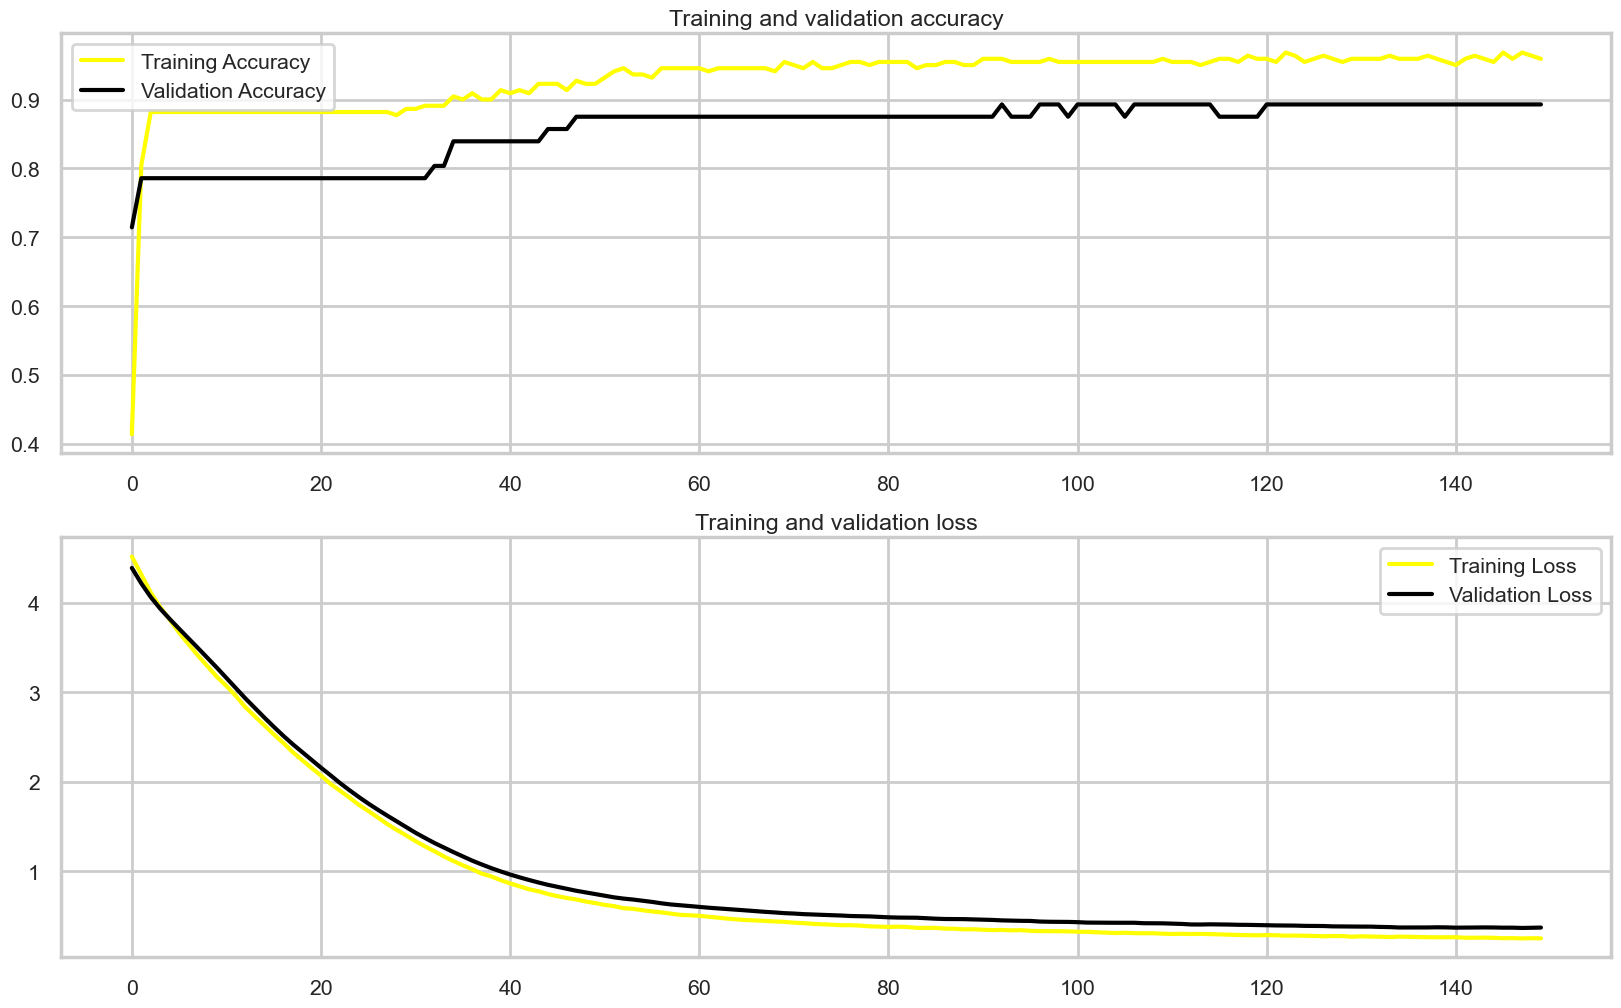

In [57]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc)) # number of epochs

plt.figure(figsize=(20, 12))
plt.subplot(2,1,1)
plt.plot(epochs, acc, "yellow", label= "Training Accuracy")
plt.plot(epochs, val_acc, "black", label= "Validation Accuracy")
plt.title("Training and validation accuracy")
plt.legend()

plt.subplot(2,1,2)
plt.plot(epochs, loss, "yellow", label= "Training Loss")
plt.plot(epochs, val_loss, "black", label= "Validation Loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()